# Object detection with YOLO

## Object detection in images

### Downloading Darknet

In [ ]:
!git clone https://github.com/AlexeyAB/darknet

In [ ]:
ls

darknet/  sample_data/


In [ ]:
cd darknet/

/content/darknet


In [ ]:
ls

### Compiling the library

In [ ]:
!make

chmod +x *.sh


### Downloading YOLO weights

In [ ]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights

# https://storage.googleapis.com/openimages/web/index.html
# !wget https://pjreddie.com/media/files/yolov3-openimages.weights

### Testing the object detector

In [ ]:
ls

3rdparty/               darknet.py              obj/
backup/                 darknet_video.py        README.md
build/                  data/                   results/
build.ps1*              image_yolov3.sh*        scripts/
build.sh*               image_yolov4.sh*        src/
cfg/                    include/                vcpkg.json
cmake/                  json_mjpeg_streams.sh*  video_yolov3.sh*
CMakeLists.txt          LICENSE                 video_yolov4.sh*
darknet*                Makefile                yolov4.weights
DarknetConfig.cmake.in  net_cam_v3.sh*
darknet_images.py       net_cam_v4.sh*


In [ ]:
#coco.names file shows 80 type of object that the model trained on coco dataset can detect
!./darknet detect cfg/yolov4.cfg yolov4.weights data/person.jpg

In [ ]:
import cv2
import matplotlib.pyplot as plt
def show_detection(path):
  image = cv2.imread(path)
  fig = plt.gcf()
  fig.set_size_inches(18,10)
  plt.axis('off')
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

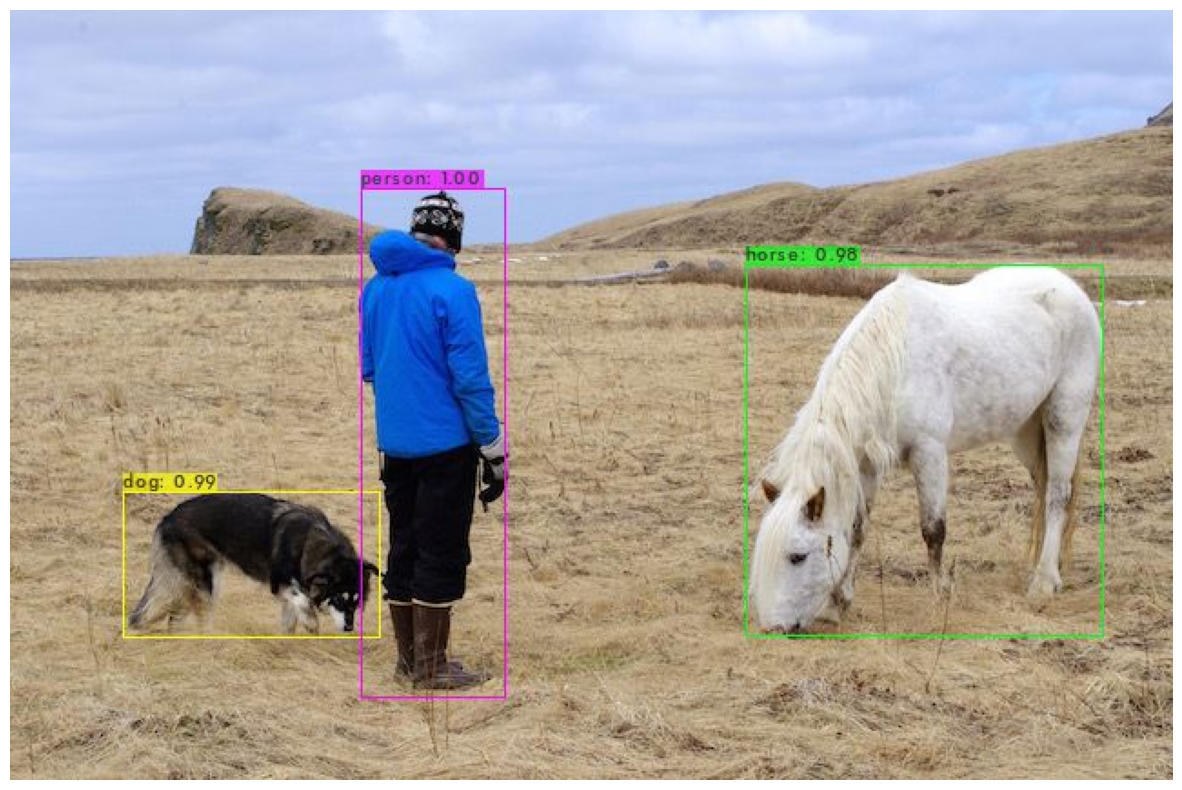

In [ ]:
show_detection('predictions.jpg')

### Darknet and GPU

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
ls

In [ ]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

In [ ]:
!make


chmod +x *.sh


In [ ]:
!./darknet detect cfg/yolov4.cfg yolov4.weights data/giraffe.jpg

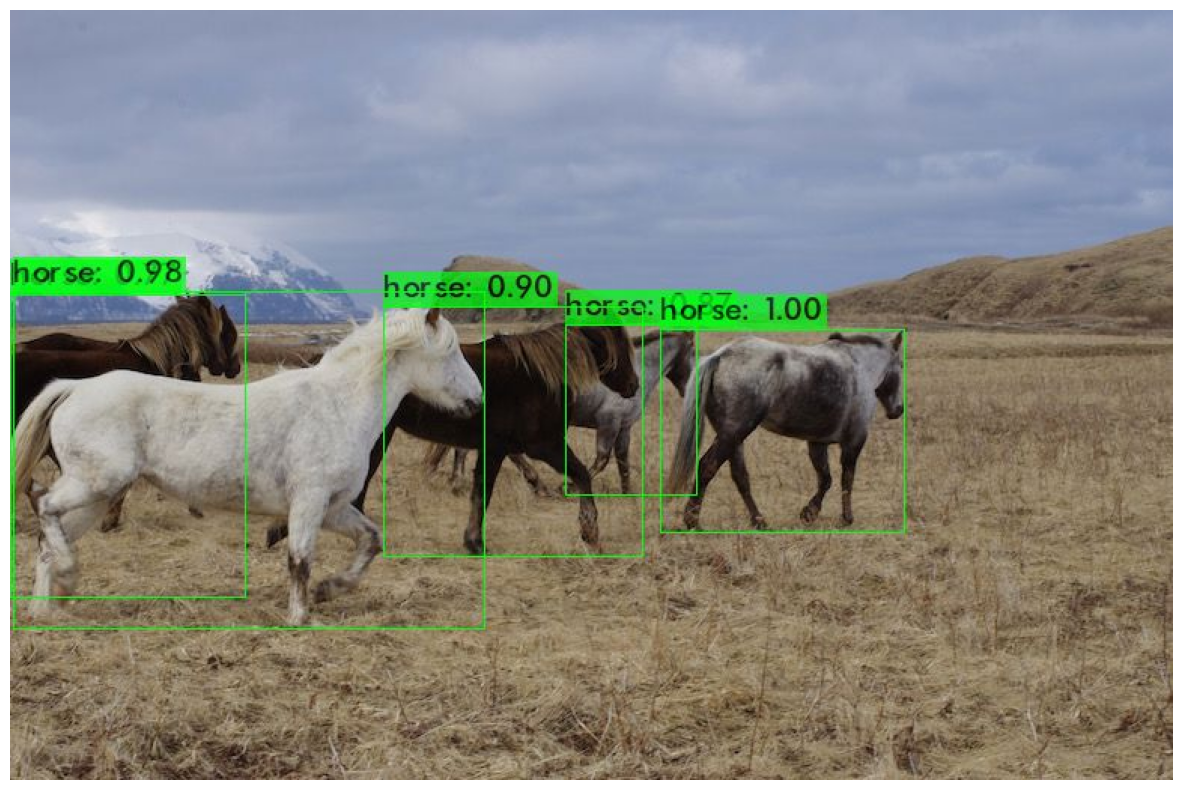

In [ ]:
show_detection('predictions.jpg')

### Threshold

In [ ]:
!./darknet detect cfg/yolov4.cfg yolov4.weights data/horses.jpg

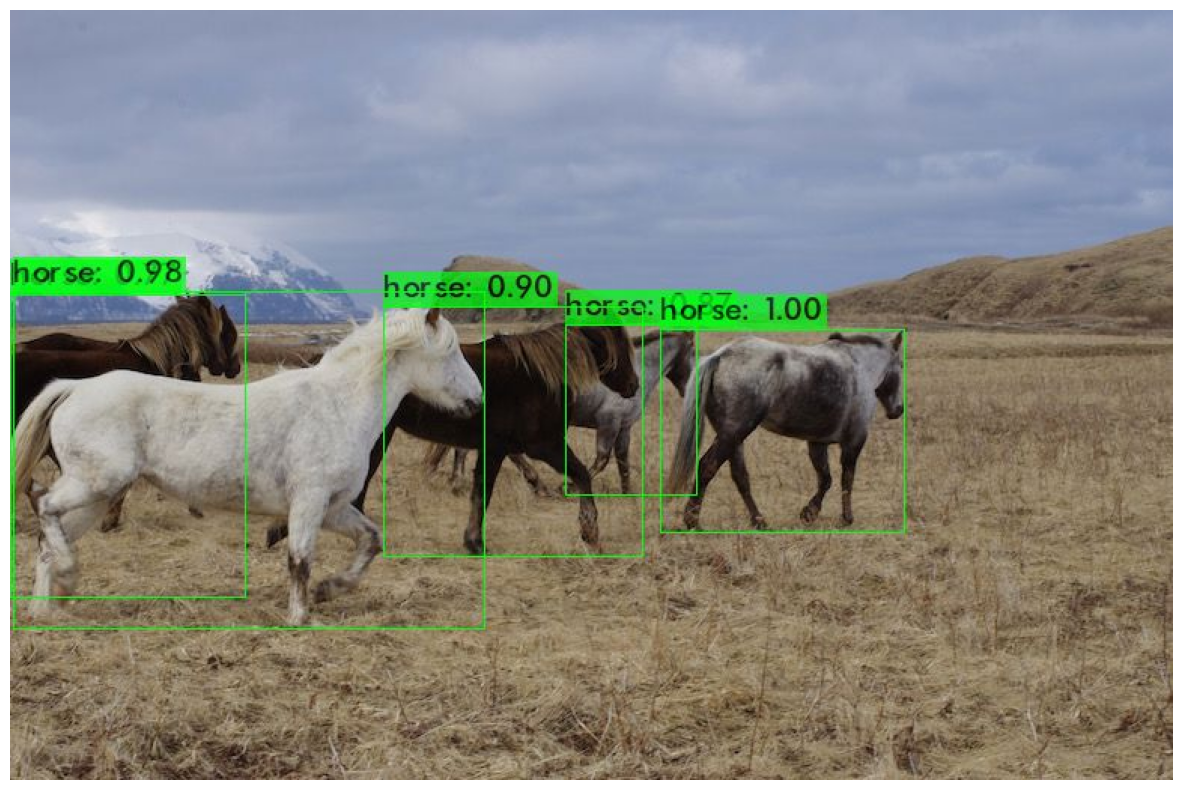

In [ ]:
show_detection('predictions.jpg')

In [ ]:
!./darknet detect cfg/yolov4.cfg yolov4.weights data/horses.jpg -thresh 0.9

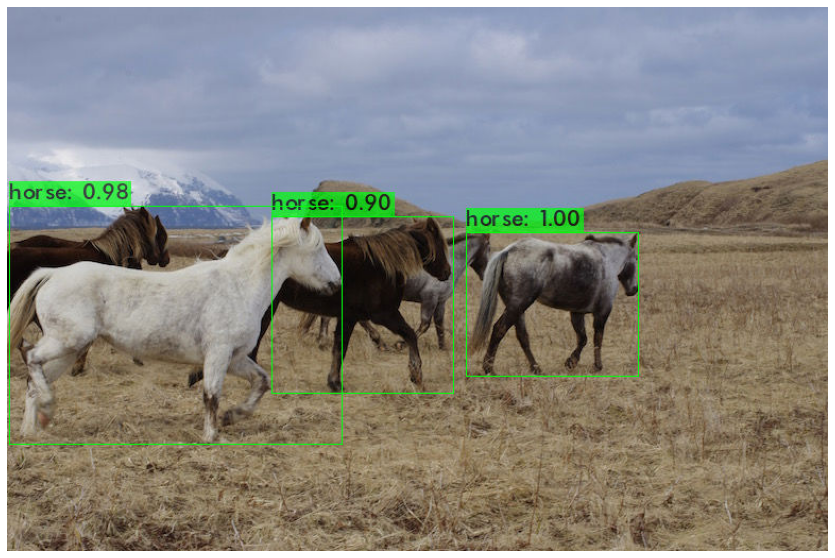

In [ ]:
show_detection('predictions.jpg')

In [ ]:
#only objects with threshold of above 0.98 percent would be detected

!./darknet detect cfg/yolov4.cfg yolov4.weights data/horses.jpg -thresh 0.98

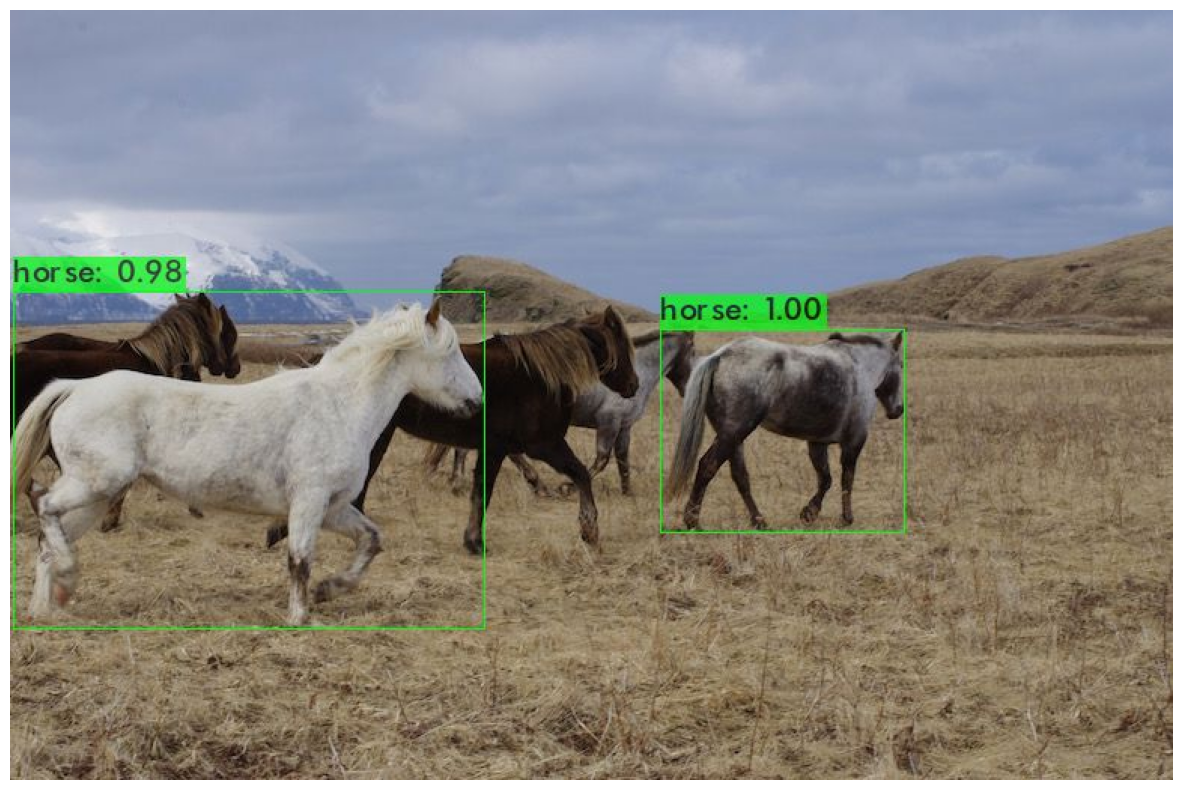

In [ ]:
show_detection('predictions.jpg')

In [ ]:
!./darknet detect cfg/yolov4.cfg yolov4.weights data/horses.jpg -thresh 0.01

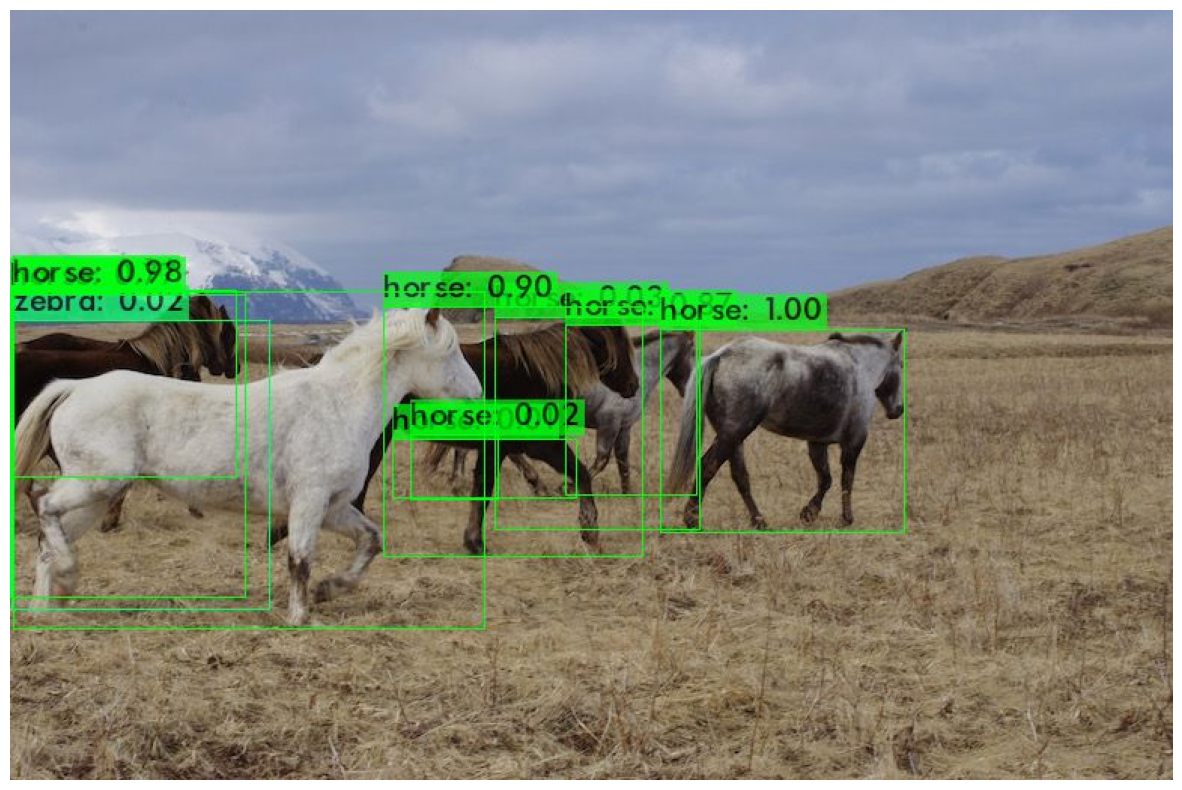

In [ ]:
show_detection('predictions.jpg')

### ext_output

In [ ]:
#shows x, y, height and width of the position of detected objected
!./darknet detect cfg/yolov4.cfg yolov4.weights data/horses.jpg -ext_output

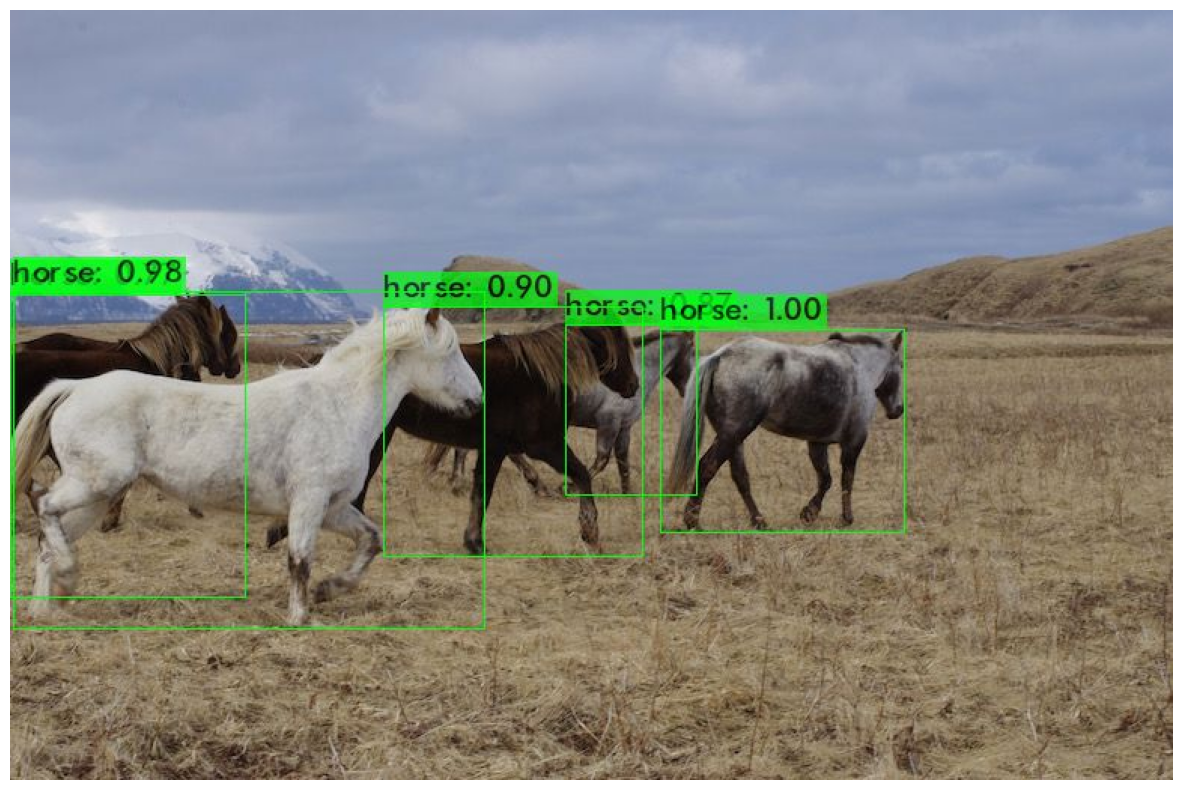

In [ ]:
show_detection('predictions.jpg')

## Object detection in videos

In [ ]:
!./darknet detector demo cfg/coco.data cfg/yolov4.cfg yolov4.weights data/car.mp4 -i 0 -out_filename data/car.avi

In [ ]:
!./darknet detector demo cfg/coco.data cfg/yolov4.cfg yolov4.weights data/people_line.mp4 -i 0 -out_filename data/people_line.avi